In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as pyo
pyo.init_notebook_mode()
import plotly.express as px 
%matplotlib inline


Output hidden; open in https://colab.research.google.com to view.

In [28]:
df=pd.read_csv("/moviestreams.csv")

In [138]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,AgeCopy,New_Rotten Tomatoes
0,Inception,2010,13.0,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,13.0,87
1,The Matrix,1999,18.0,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,18.0,87
2,Avengers: Infinity War,2018,13.0,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,13.0,84
3,Back to the Future,1985,7.0,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,7.0,96
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0,97


In [30]:
df.columns.tolist()

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [31]:
df.drop(['Unnamed: 0','ID'],axis=1,inplace=True)

In [32]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [33]:
df.shape

(16744, 15)

Checking for missing values.

In [34]:
df.isnull().sum()

Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

Let's remove the '+' sign attached to the values in the Age column.

In [35]:
df["Age"]

0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Age, Length: 16744, dtype: object

In [36]:
age_map = {'18+' : 18, '7+' : 7, '13+': 13, 'all' : 0, '16+' : 16}
df['AgeCopy'] = df['Age'].map(age_map)
df['AgeCopy']

0        13.0
1        18.0
2        13.0
3         7.0
4        18.0
         ... 
16739     NaN
16740     7.0
16741     NaN
16742     NaN
16743     NaN
Name: AgeCopy, Length: 16744, dtype: float64

In [41]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,AgeCopy
0,Inception,2010,13.0,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,13.0
1,The Matrix,1999,18.0,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,18.0
2,Avengers: Infinity War,2018,13.0,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,13.0
3,Back to the Future,1985,7.0,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,7.0
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0


Let's remove the '%' sign attached to the values in the Rotten Tomatoes column.

In [49]:
df["New_Rotten Tomatoes"]=df["Rotten Tomatoes"].str.replace("%","")
for i in df["New_Rotten Tomatoes"]:
  if i==str:
    i.astype(int)
df["New_Rotten Tomatoes"]

0         87
1         87
2         84
3         96
4         97
        ... 
16739    NaN
16740    NaN
16741    NaN
16742    NaN
16743    NaN
Name: New_Rotten Tomatoes, Length: 16744, dtype: object

What Is The Number Of Movies For Each Age Group?

In [51]:
df["Age"].value_counts()

18.0    3474
7.0     1462
13.0    1255
0.0      843
16.0     320
Name: Age, dtype: int64

Top 10 languages in Streaming Services

In [54]:
Language=df["Language"].value_counts().head(10)

<function matplotlib.pyplot.show(*args, **kw)>

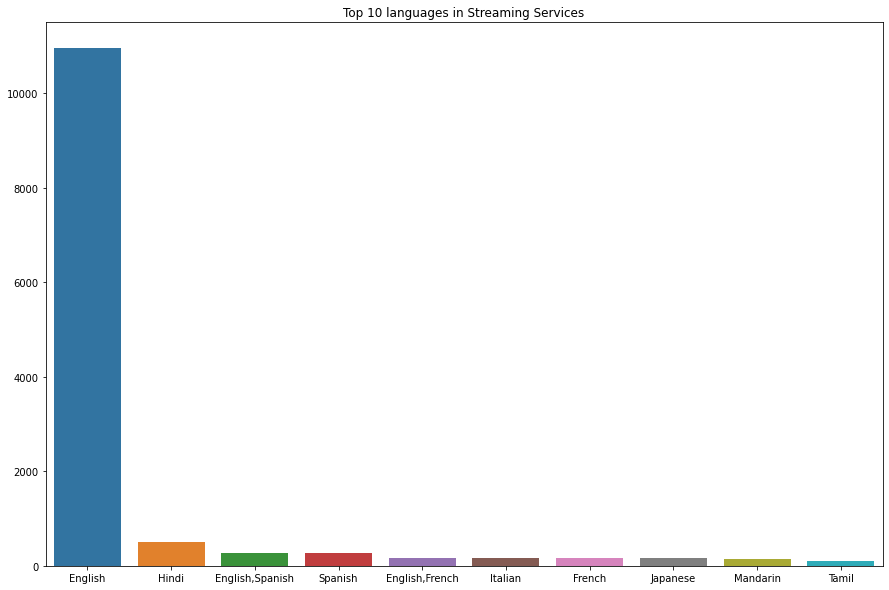

In [64]:
plt.figure(figsize=(15,10))
plt.title("Top 10 languages in Streaming Services")
sns.barplot(x=Language.index,y=Language.values)
plt.show

Number of Movies in specific age group in All services

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



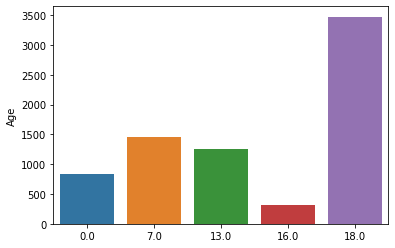

In [68]:
x=df["Age"].value_counts().index
y=df["Age"].value_counts()
sns.barplot(x,y,data=df)

In [69]:
from IPython.display import HTML
import plotly.express as px
fig = px.bar(df, 
             x=df['Age'].value_counts().index, 
             y=df['Age'].value_counts(),
             title="Number of Movies in specific age group in All services",
             text=df['Age'].value_counts(),
             height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Number of Movies in specific age group in Netflix

In [74]:
from IPython.display import HTML
import plotly.express as px
netflix_df=df[df['Netflix']==1]
fig = px.bar(netflix_df, 
             x=netflix_df['Age'].value_counts().index, 
             y=netflix_df['Age'].value_counts(),
             title="Number of Movies in specific age group in Netflix",
             text=netflix_df['Age'].value_counts(), 
 #for the text to be outside.
HTML(fig.to_html())             height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

Output hidden; open in https://colab.research.google.com to view.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



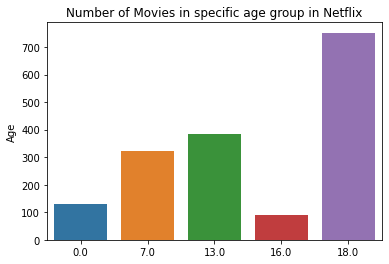

In [90]:
netflix=df[df["Netflix"]==1]
x=netflix["Age"].value_counts().index
y=netflix["Age"].value_counts()
plt.title("Number of Movies in specific age group in Netflix")
sns.barplot(x,y,data=netflix)

Number of Movies in specific age group in Amazon Prime Video

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



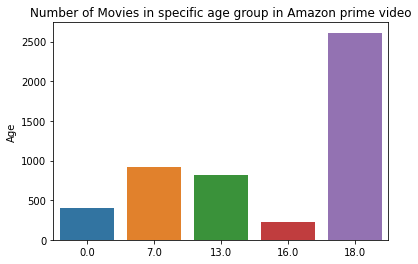

In [89]:
amazon=df[df["Prime Video"]==1]
x=amazon["Age"].value_counts().index
y=amazon["Age"].value_counts()
plt.title("Number of Movies in specific age group in Amazon prime video")
sns.barplot(x,y,data=amazon)

In [94]:
from IPython.display import HTML
import plotly.express as px
amazon=df[df["Prime Video"]==1]
fig=px.bar(amazon,
           x=amazon["Age"].value_counts().index,
           y=amazon["Age"].value_counts(),
           text=amazon["Age"].value_counts(),
           title="Number of Movies in specific age group in Amazon Prime Video",
           height=600)
fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')
HTML(fig.to_html())


Output hidden; open in https://colab.research.google.com to view.


Number of Movies in specific age group in Disney+

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Number of Movies in specific age group in Disney+')

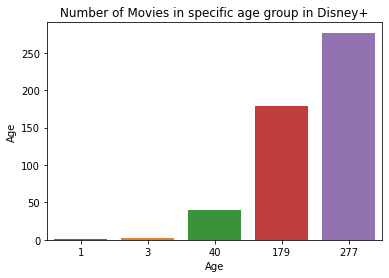

In [98]:
disney=df[df['Disney+']==1]
x=disney["Age"].value_counts().index
y=x=disney["Age"].value_counts()
sns.barplot(x,y,data=disney)
plt.title("Number of Movies in specific age group in Disney+")

Number of Movies in specific age group in Hulu

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



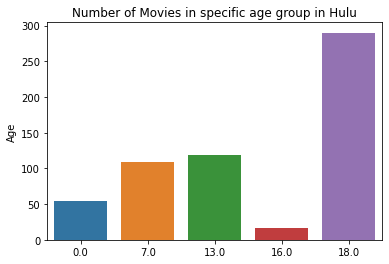

In [102]:
hulu=df[df['Hulu']==1]
x=hulu["Age"].value_counts().index
y=hulu["Age"].value_counts()
plt.title("Number of Movies in specific age group in Hulu")
sns.barplot(x,y,data=hulu)

Rotten Tomatoes Score rating

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



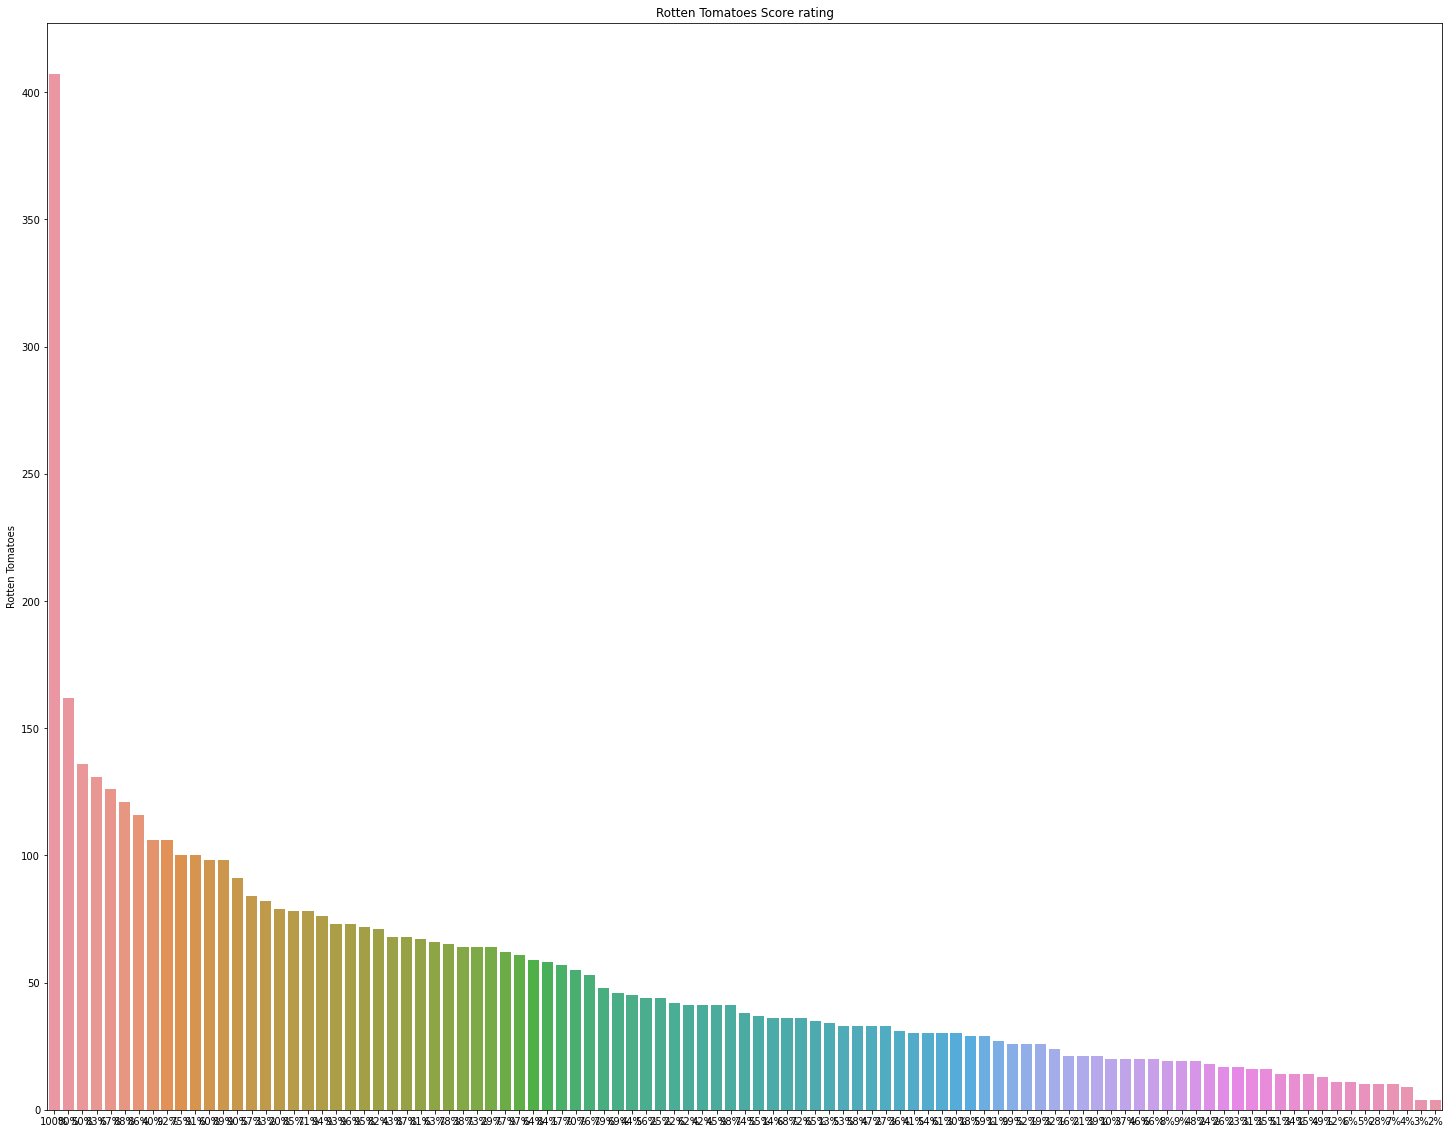

In [106]:
plt.figure(figsize=(25,20))
plt.title("Rotten Tomatoes Score rating")
x=df['Rotten Tomatoes'].value_counts().index
y=df['Rotten Tomatoes'].value_counts()
sns.barplot(x,y,data=df)


Rotten Tomato Ratings For Each Services

In [107]:
rt_scores = pd.DataFrame({'Streaming Service': ["Prime Video", "Hulu","Disney+","NetFlix"],
                                    'Rotten Tomato Score' : [netflix['Rotten Tomatoes'].value_counts()[0], 
                                                             amazon['Rotten Tomatoes'].value_counts()[0],
                                                             disney['Rotten Tomatoes'].value_counts()[0],
                                                             hulu['Rotten Tomatoes'].value_counts()[0]]})
rt_scores.head()

,Streaming Service,Rotten Tomato Score
0,Prime Video,130
1,Hulu,257
2,Disney+,19
3,NetFlix,18


In [111]:
sort_rt=rt_scores.sort_values(ascending=False,by='Rotten Tomato Score')
sort_rt

,Streaming Service,Rotten Tomato Score
1,Hulu,257
0,Prime Video,130
2,Disney+,19
3,NetFlix,18


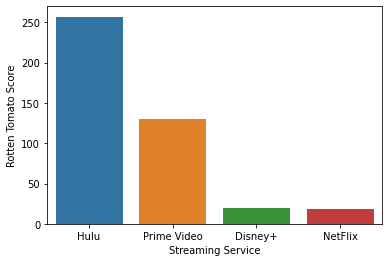

In [112]:
sns.barplot(x=sort_rt["Streaming Service"],y=sort_rt["Rotten Tomato Score"])

IMDB Ratings

In [113]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,AgeCopy,New_Rotten Tomatoes
0,Inception,2010,13.0,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,13.0,87
1,The Matrix,1999,18.0,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,18.0,87
2,Avengers: Infinity War,2018,13.0,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,13.0,84
3,Back to the Future,1985,7.0,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,7.0,96
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0,97


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



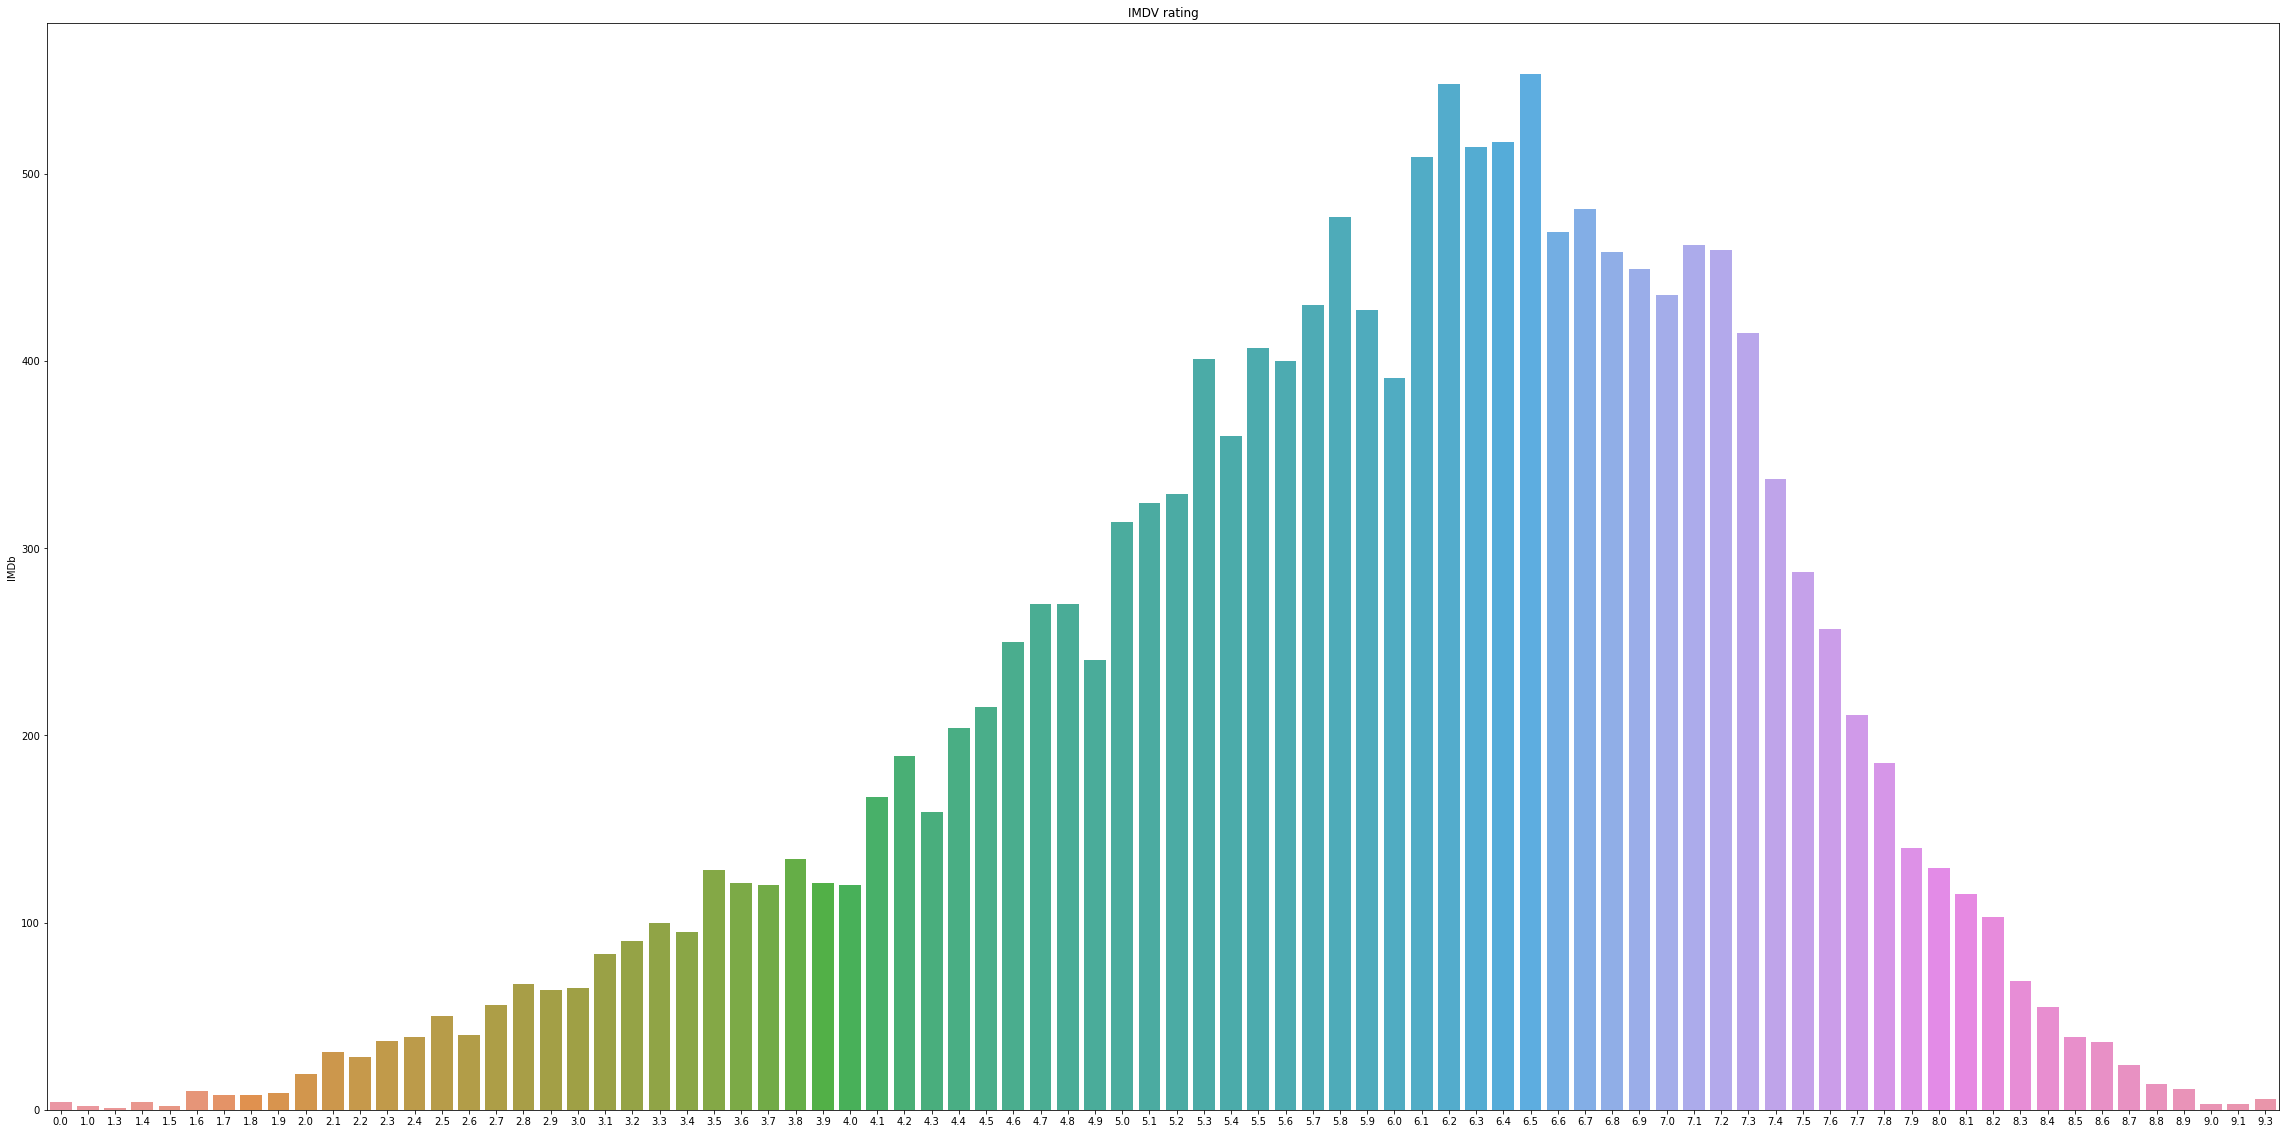

In [116]:
plt.figure(figsize=(40,20))
y=df["IMDb"].value_counts()
x=df["IMDb"].value_counts().index
plt.title("IMDV rating")
sns.barplot(x,y,data=df)

Count Of Runtimes Of Movies

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



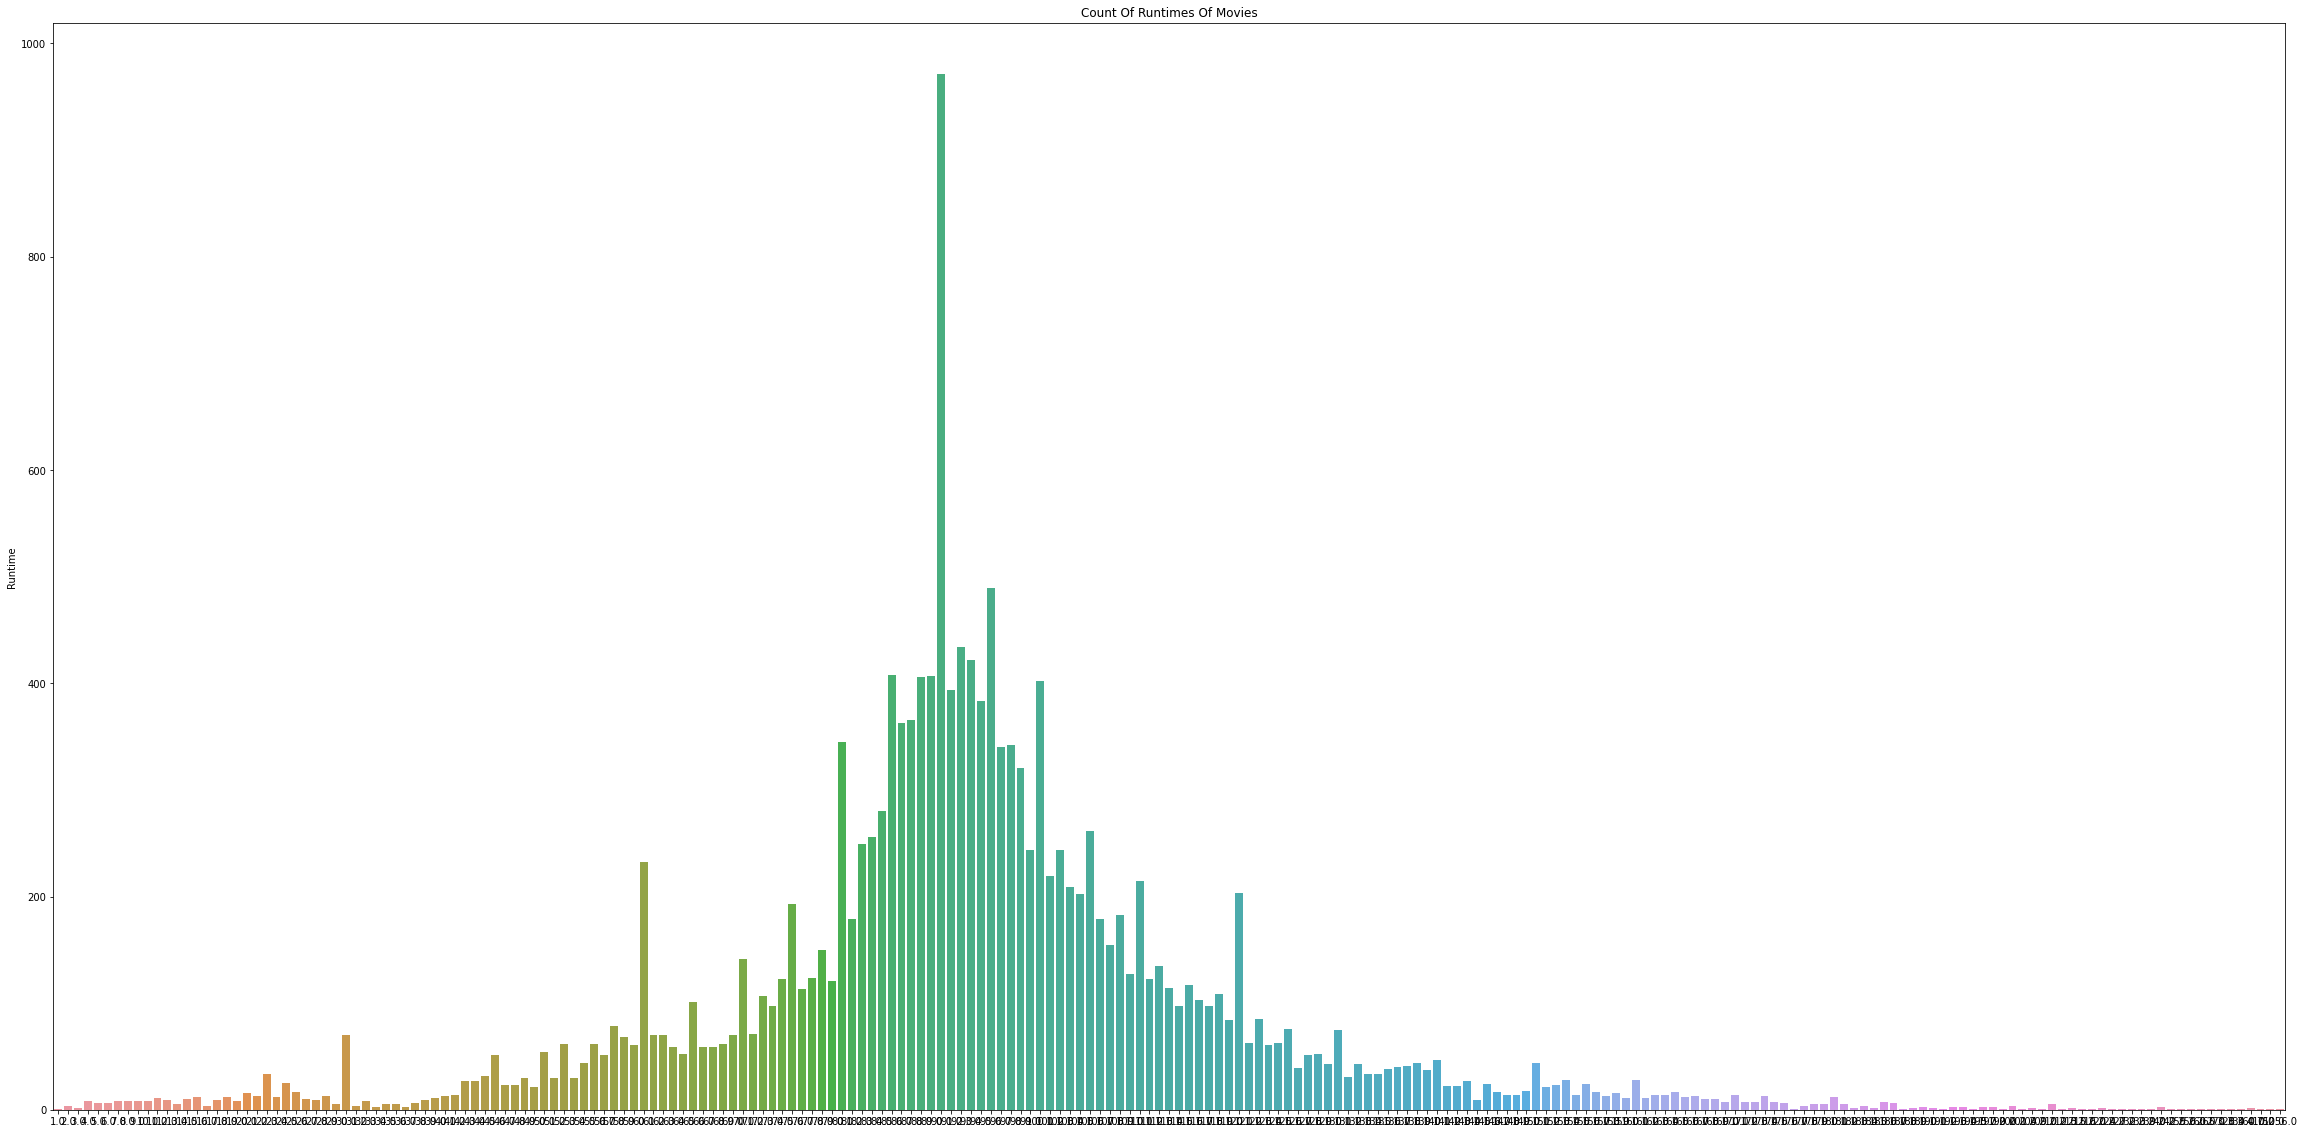

In [118]:
plt.figure(figsize=(40,20))
y=df["Runtime"].value_counts()
x=df["Runtime"].value_counts().index
plt.title("Count Of Runtimes Of Movies")
sns.barplot(x,y,data=df)

In [126]:
RuntimeCount=pd.DataFrame(dict(df['Runtime'].value_counts().sort_values(ascending=False)[:10]).items(), 
             columns=['Runtime', 'Count'])
RuntimeCount

,Runtime,Count
0,90.0,971
1,95.0,489
2,92.0,434
3,93.0,422
4,85.0,408
...,...,...
152,19.0,8
153,32.0,8
154,9.0,8
155,7.0,8


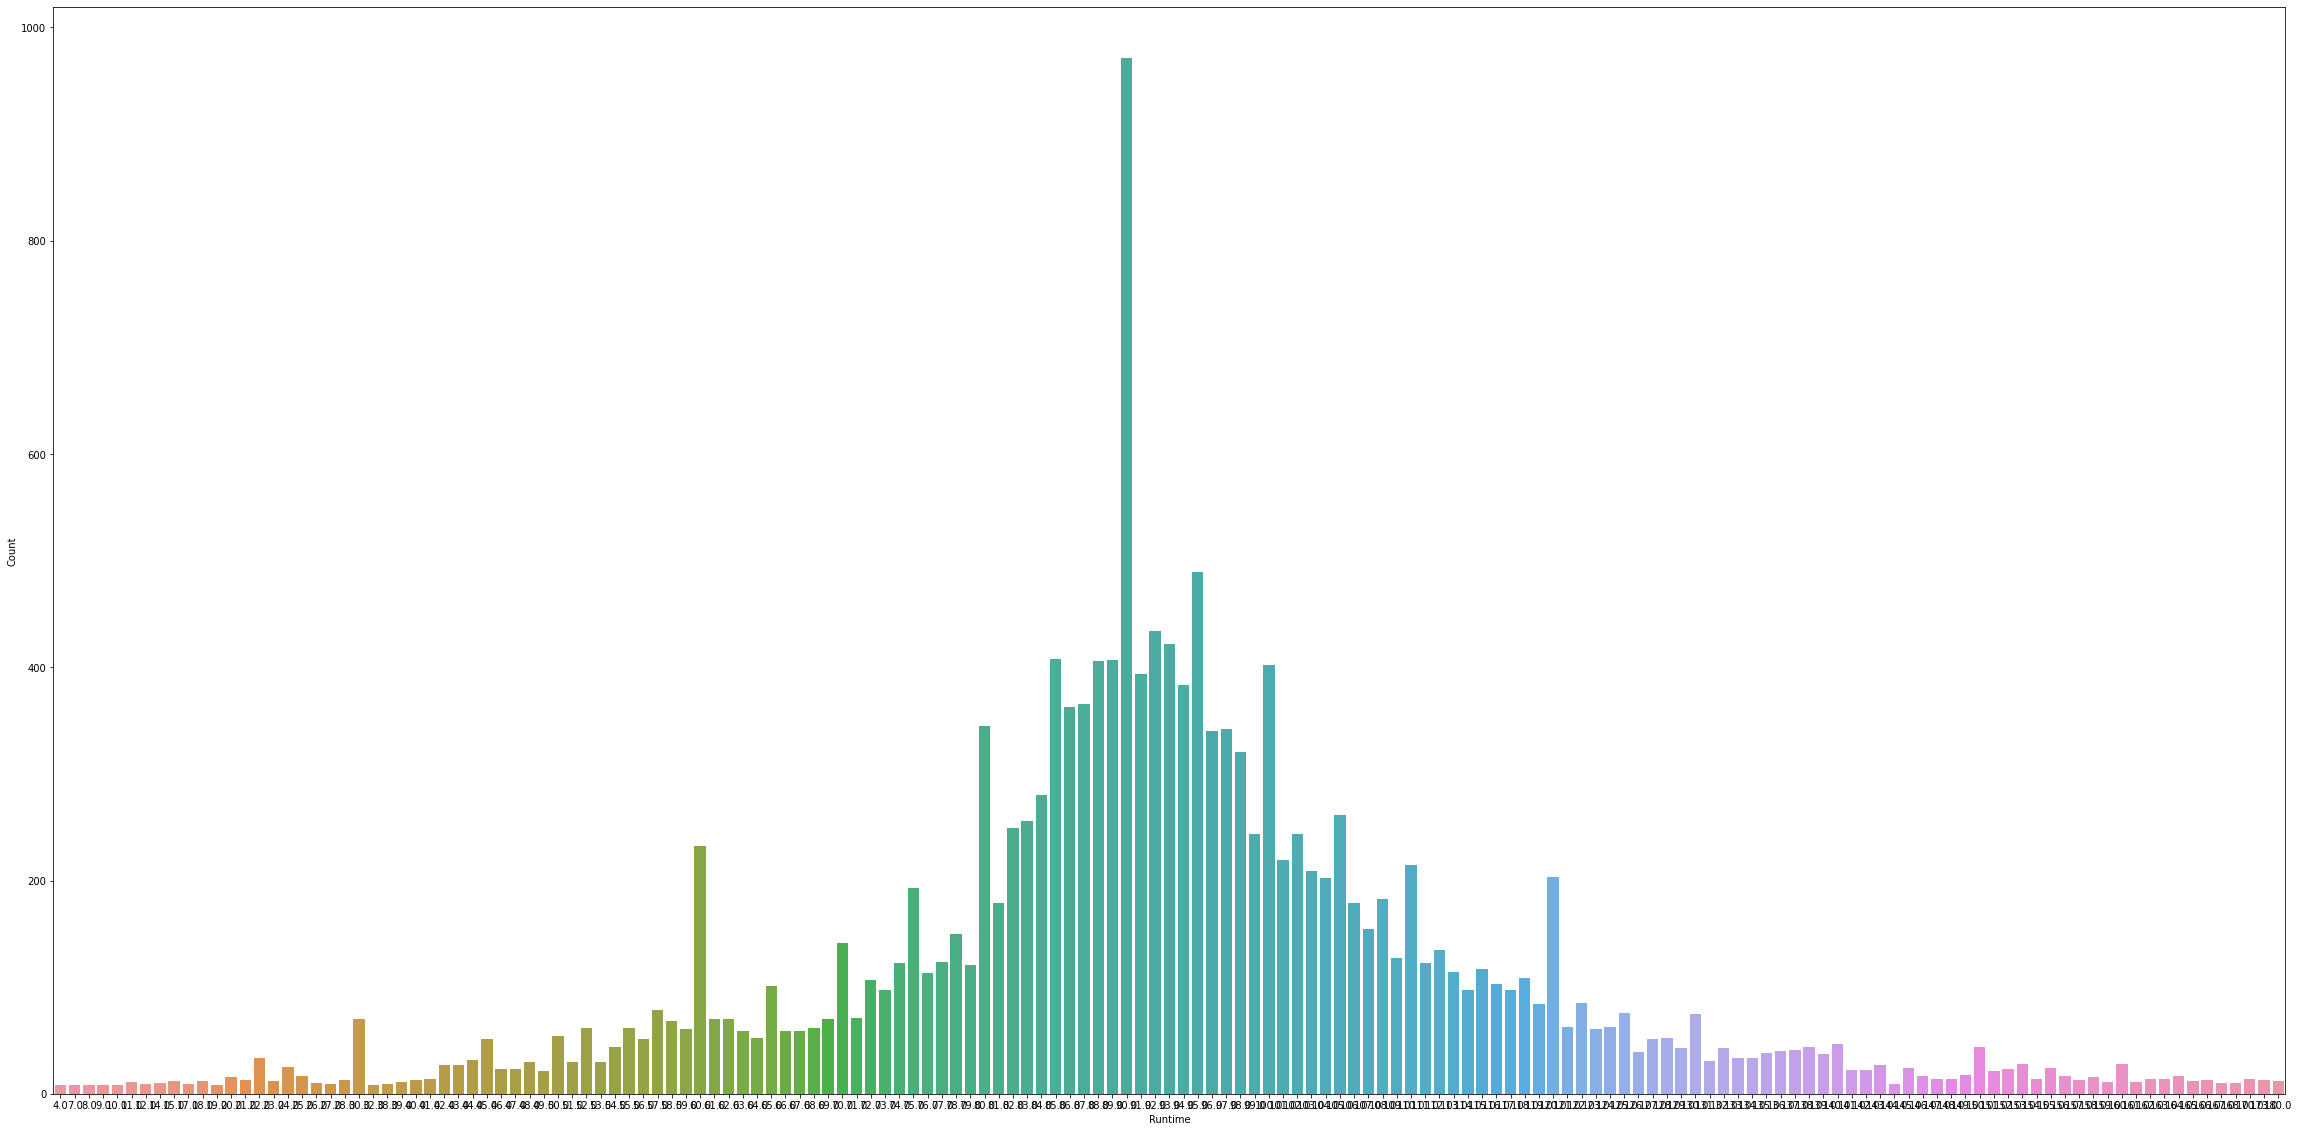

In [129]:
plt.figure(figsize=(40,20))
sns.barplot(x=RuntimeCount["Runtime"],y=RuntimeCount["Count"])


Directors And Their Count Of Movies They Have Directed

In [146]:
df['Directors']=df['Directors'].astype(str) 

In [153]:
new_data = df[df['Directors'] !=np.nan]
directors_count = dict()
dir_in_data = list(new_data['Directors'])
for xdir in dir_in_data:
    curr_dir = xdir.split(",")
    for xd in curr_dir:
        if xd in directors_count.keys():
            directors_count[xd] = directors_count.get(xd) + 1
            # print(directors_count[xd])
            # print('========================')
        else:
            directors_count[xd] = 1
            # print(directors_count[xd])

In [154]:

 DirCount = pd.DataFrame(directors_count.items(), columns=['Director', 'Count'])
 DirCount=DirCount.sort_values(ascending=False, by='Count').head(20)
 DirCount


,Director,Count
56,nan,726
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21


In [157]:
dircount=DirCount.drop(56,axis=0)
dircount

,Director,Count
977,Jay Chapman,36
8166,Joseph Kane,31
1103,Cheh Chang,29
6950,William Beaudine,23
4827,Jim Wynorski,23
8665,Sam Newfield,22
8519,David DeCoteau,21
1414,Raúl Campos,21
136,Jay Karas,21
1415,Jan Suter,21


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



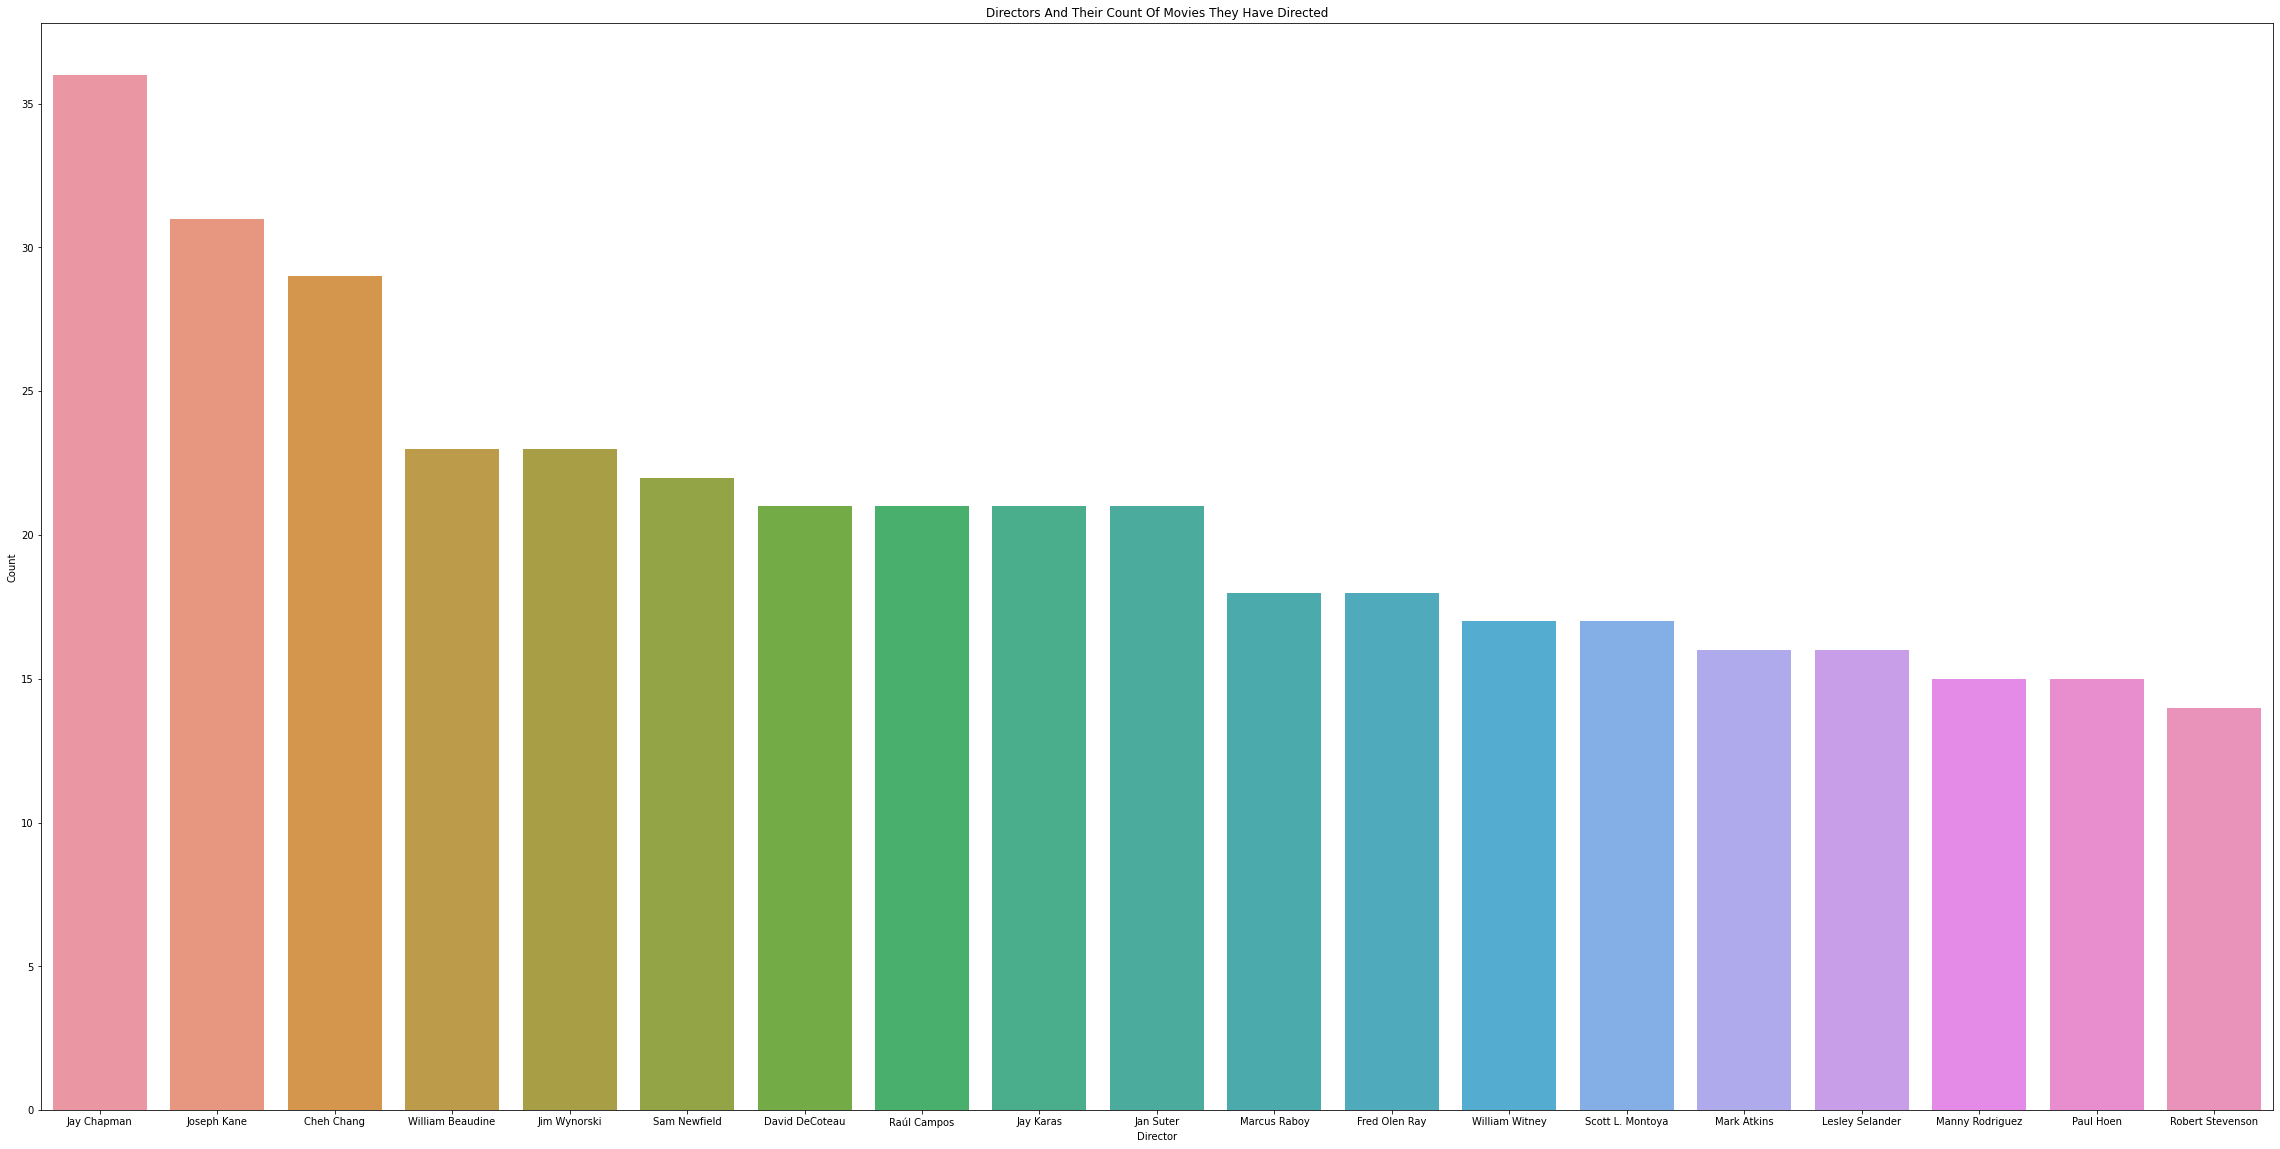

In [163]:
plt.figure(figsize=(40,20))
x=dircount["Director"]
plt.title("Directors And Their Count Of Movies They Have Directed")
y=dircount["Count"]
sns.barplot(x,y,data=dircount)

We can see from above that Jay Chapman has directed most of the movies.

Below is the list of movies directed by Jay Chapman

In [166]:
df[df['Directors']=='Jay Chapman'][['Directors','Title','Genres']]

,Directors,Title,Genres
1014,Jay Chapman,Jim Gaffigan: Obsessed,"Documentary,Comedy"
1234,Jay Chapman,Iliza Shlesinger: War Paint,Comedy
1417,Jay Chapman,Tom Segura: Completely Normal,"Documentary,Comedy"
2211,Jay Chapman,Todd Barry: Spicy Honey,Comedy
2331,Jay Chapman,Craig Ferguson: Tickle Fight,Comedy
2393,Jay Chapman,Colin Quinn: Unconstitutional,Comedy
2447,Jay Chapman,Lucas Brothers: On Drugs,Comedy
2523,Jay Chapman,D.L. Hughley: Contrarian,Comedy
2636,Jay Chapman,D.L. Hughley: Clear,Comedy
2721,Jay Chapman,Moshe Kasher: Live in Oakland,Comedy


Geners

In [167]:
genres_= dict(df['Genres'].value_counts())
count_genres = dict()
for g,count in genres_.items():
    g = g.split(",")
    for i in g:
        if i in count_genres.keys():
            count_genres[i] = count_genres.get(i)+1
        else:
            count_genres[i] = 1




In [168]:
count_genres_df = pd.DataFrame(count_genres.items(), columns=['Genre', 'Count'])
count_genres_df

,Genre,Count
0,Drama,868
1,Documentary,249
2,Comedy,654
3,Horror,296
4,Romance,420
5,Thriller,467
6,Action,553
7,Crime,347
8,Music,171
9,Mystery,318


In [169]:
fig = px.bar(count_genres_df, 
             x=count_genres_df['Genre'], 
             y=count_genres_df['Count'],
             title="Genre And their Counts",
             text=count_genres_df['Count'],
             height=600)
fig.update_traces(marker_color='lightsalmon',texttemplate='%{text:.2s}', textposition='outside') #for the text to be outside.
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

In [170]:
data_netflix_top = netflix[netflix['IMDb']>8.5]
data_netflix_top = data_netflix_top[['Title', 'IMDb']].sort_values(ascending=False, by='IMDb')
data_netflix_top

,Title,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,9.3
947,Natsamrat,9.1
0,Inception,8.8
4,"The Good, the Bad and the Ugly",8.8
1,The Matrix,8.7
1214,Bill Hicks: Relentless,8.7
1311,Eh Janam Tumhare Lekhe,8.7
1458,Untamed Romania,8.7
1979,One Heart: The A.R. Rahman Concert Film,8.7
845,Gol Maal,8.6


In [176]:
fig=px.bar(data_netflix_top,
           x=data_netflix_top["Title"],
           y=data_netflix_top["IMDb"],
           text=data_netflix_top["IMDb"],
           title="Top Movies On Netflix",
           height=800)
fig.update_traces(texttemplate="%{text:.2s}",textposition="outside")
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

On Amazon prime

In [178]:
top_rating=amazon[amazon["IMDb"]>8.5]
top_rating=top_rating[["Title","IMDb"]].sort_values(ascending=False,by="IMDb")
top_rating

,Title,IMDb
5110,Love on a Leash,9.3
7426,Bounty,9.3
6837,Steven Banks: Home Entertainment Center,9.3
6566,Square One,9.3
7220,"Down, But Not Out!",9.3
...,...,...
5730,George Carlin: You Are All Diseased,8.6
5607,Aruvi,8.6
9004,The Legend of Pancho Barnes and the Happy Bott...,8.6
9098,Yellow Colt,8.6


In [184]:
fig=px.bar(top_rating,
           x=top_rating["Title"],
           y=top_rating["IMDb"],
           text=top_rating["IMDb"],
           title="top movies on amazon",
           height=1500)
fig.update_traces(texttemplate="%{text:.2s}",textposition="outside")
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

On Disney+

In [186]:
top_rating=disney[disney["IMDb"]>8.5]
top_rating_disney=top_rating[["Title","IMDb"]].sort_values(ascending=False,by="IMDb")
top_rating_disney

,Title,IMDb
16213,Star Wars: The Empire Strikes Back,8.7
16212,Star Wars: A New Hope,8.6


In [191]:
fig=px.bar(top_rating_disney,
           x=top_rating_disney["Title"],
           y=top_rating_disney["IMDb"],
           text=top_rating_disney["IMDb"],
           title="top movies on Disney+",
           height=600)
fig.update_traces(texttemplate="%{text:.2s}",textposition="outside")
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

Top movies on Hulu.

In [189]:
top_rating=hulu[hulu["IMDb"]>8.5]
top_rating_hulu=top_rating[["Title","IMDb"]].sort_values(ascending=False,by="IMDb")
top_rating_hulu

,Title,IMDb
3560,The Dark Knight,9.0
3561,GoodFellas,8.7
3562,Parasite,8.6
3564,The Green Mile,8.6


In [192]:
fig=px.bar(top_rating_hulu,
           x=top_rating_hulu["Title"],
           y=top_rating_hulu["IMDb"],
           text=top_rating_hulu["IMDb"],
           title="top movies on Hulu",
           height=600)
fig.update_traces(texttemplate="%{text:.2s}",textposition="outside")
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.

What is the average streaming time on each platform?

In [195]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime,AgeCopy,New_Rotten Tomatoes
0,Inception,2010,13.0,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0,13.0,87
1,The Matrix,1999,18.0,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0,18.0,87
2,Avengers: Infinity War,2018,13.0,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0,13.0,84
3,Back to the Future,1985,7.0,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0,7.0,96
4,"The Good, the Bad and the Ugly",1966,18.0,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0,18.0,97


average streaming on netflix.

In [235]:
netflix["Runtime"].mean()

98.91290032924275

average streaming on Amazon.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [234]:
amazon["Runtime"].mean()


92.29398032349508

average streaming on Disney+.

In [233]:
disney["Runtime"].mean()


90.42522522522522

average streaming on Hulu.

In [232]:

hulu["Runtime"].mean()

97.39661016949152

Top movies before 1990.

In [229]:
top_rating=hulu[hulu["Year"]<1990]
top_rating_hulu=top_rating[["Title","IMDb","Year"]].sort_values(ascending=False,by="IMDb")
top_rating_hulu

,Title,IMDb,Year
3566,Grave of the Fireflies,8.5,1988
3573,Akira,8.0,1988
3576,The Graduate,8.0,1967
3983,The Lorax,8.0,1972
3656,Hud,7.8,1963
3583,Blazing Saddles,7.7,1974
3589,Star Trek II: The Wrath of Khan,7.7,1982
3678,Johnny Guitar,7.7,1954
3588,Escape from Alcatraz,7.6,1979
4020,"Race for Your Life, Charlie Brown",7.3,1977


In [231]:
fig=px.bar(top_rating_hulu,
           x=top_rating_hulu["Year"],
           y=top_rating_hulu["IMDb"],
           text=top_rating_hulu["IMDb"],
           title="top movies before 1990.",
           height=600)
fig.update_traces(texttemplate="%{text:.2s}",textposition="outside")
HTML(fig.to_html())

Output hidden; open in https://colab.research.google.com to view.